<a href="https://colab.research.google.com/github/GerardoMunoz/Vision/blob/main/GroundingDINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRANTES

*   JHONATAN GONZALEZ SALGUERO 20241695009

*  LINA PAOLA GARCIA MALAGÓN  20241695007




In [ ]:
#INSTALACIÓN DE PAQUETES

!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install -q -e .
!pip install supervision
!pip install git+https://github.com/IDEA-Research/GroundingDINO.git
!pip install kagglehub
!pip install segment-anything
!pip install segment-anything opencv-python matplotlib torch torchvision
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd GroundingDINO
!pip install -e .
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!wget https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P checkpoints


  Cloning https://github.com/IDEA-Research/GroundingDINO.git to /tmp/pip-req-build-vcyfot3c
  Running command git clone --filter=blob:none --quiet https://github.com/IDEA-Research/GroundingDINO.git /tmp/pip-req-build-vcyfot3c
  Resolved https://github.com/IDEA-Research/GroundingDINO.git to commit 856dde20aee659246248e20734ef9ba5214f5e44
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 21.7 MB/s eta 0:00:00
  Created wheel for groundingdino: filename=groundingdino-0.1.0-cp310-cp310-linux_x86_64.whl size=3045822 sha256=2e1cb034acdf752cc0945bd0457cbc1fb80d1edb899bdd5635df651a39d58d03
  Stored in directory: /tmp/pip-ephem-wheel-cache-jzvjjids/wheels/6b/06/d7/b57f601a4df56af41d262a5b1b496359b13c323bf5ef0434b2
Successfully built groundingdino
ERROR: file:///content does not appear to

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/CLASE3_BIG_DATA"

import os
if not os.path.exists(dir):
    os.makedirs(dir)

Mounted at /content/drive


In [ ]:
import kagglehub
from shutil import copytree

path = kagglehub.dataset_download("aziz7752/satelite-images")
target_dir = os.path.join (dir, "sparse_residential")
copytree(path, target_dir, dirs_exist_ok=True)
print(f"Dataset descargado en: {target_dir}")


100%|██████████| 407M/407M [00:22<00:00, 19.1MB/s]

Extracting files...


Dataset descargado en: /content/drive/MyDrive/CLASE3_BIG_DATA/sparse_residential


In [ ]:
!pwd

/content/GroundingDINO


In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 463 (delta 175), reused 136 (delta 136), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [ ]:
%cd GroundingDINO/

/content/GroundingDINO/GroundingDINO


In [ ]:
%cd ..
!mkdir weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth -P weights

/content/GroundingDINO


In [ ]:
!pwd

/content/GroundingDINO


In [ ]:
!dir

build	     Dockerfile        groundingdino	       LICENSE		 setup.py
checkpoints  docker_test.py    GroundingDINO	       README.md	 test.ipynb
demo	     environment.yaml  groundingdino.egg-info  requirements.txt  weights


* Entorno de ejecución -> Reiniciar sesión
* Entorno de ejecución -> Ejecutar celda y las de abajo

In [ ]:
# cARGAR MODELO GROUNDING DINO
from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py",
     "weights/groundingdino_swint_ogc.pth")

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

# SOLO PARA UNA IMAGEN

In [ ]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import os
from tqdm import tqdm
from PIL import Image

# Cargar el modelo
model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

# Parámetros para la detección
text = "Building"  # Este es el texto que se usará como caption
BOX_THRESHOLD = 0.22  # Ajustado para detectar más cajas
TEXT_THRESHOLD = 0.10  # Ajustado para detectar más texto

# Directorios de entrada y salida
input_folder = "/content/drive/MyDrive/CLASE3_BIG_DATA/sparse_residential/ISatelitales/sparse_residential"
output_folder = "/content/drive/MyDrive/CLASE3_BIG_DATA/detection"
os.makedirs(output_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg"))]

# Procesar imágenes
for filename in tqdm(all_files):
    if filename.endswith((".jpg")):
        image_path = os.path.join(input_folder, filename)
        try:
            # Cargar imagen y preprocesar
            image_source, image_tensor = load_image(image_path)

            # Realizar la predicción (ahora incluyendo 'caption')
            boxes, logits, phrases = predict(model=model,
                                              image=image_tensor,
                                              caption=text,  # Agregado el argumento 'caption'
                                              box_threshold=BOX_THRESHOLD,
                                              text_threshold=TEXT_THRESHOLD,
                                              device="cuda")  # Cambiar a 'cuda' si tienes GPU

            # Anotar la imagen
            annotated_frame = annotate(image_source=image_source,
                                       boxes=boxes,
                                       logits=logits,
                                       phrases=phrases)

            # Guardar la imagen anotada
            output_image_path = os.path.join(output_folder, filename)
            annotated_pil = Image.fromarray(annotated_frame)
            annotated_pil.save(output_image_path)

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print(f"Annotated images saved in: {output_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 700/700 [03:33<00:00,  3.29it/s]

Annotated images saved in: /content/drive/MyDrive/CLASE3_BIG_DATA/detection


In [ ]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import os
from tqdm import tqdm
from PIL import Image

# Cargar el modelo
model = load_model("/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "weights/groundingdino_swint_ogc.pth")

# Parámetros para la detección
text = "Building"  # Este es el texto que se usará como caption
BOX_THRESHOLD = 0.22  # Ajustado para detectar más cajas
TEXT_THRESHOLD = 0.10  # Ajustado para detectar más texto

# Directorios de entrada y salida
input_folder = "/content/drive/MyDrive/CLASE3_BIG_DATA/sparse_residential/ISatelitales/sparse_residential"
output_folder = "/content/drive/MyDrive/CLASE3_BIG_DATA/detection"
labels_folder = "/content/drive/MyDrive/CLASE3_BIG_DATA/etiquetasYOLO"  # Carpeta para etiquetas YOLO
os.makedirs(output_folder, exist_ok=True)
os.makedirs(labels_folder, exist_ok=True)

# Obtener todas las imágenes .jpg en el directorio de entrada
all_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg"))]

# Procesar imágenes
for filename in tqdm(all_files):
    if filename.endswith((".jpg")):
        image_path = os.path.join(input_folder, filename)
        try:
            # Cargar imagen y preprocesar
            image_source, image_tensor = load_image(image_path)

            # Realizar la predicción (ahora incluyendo 'caption')
            boxes, logits, phrases = predict(model=model,
                                              image=image_tensor,
                                              caption=text,
                                              box_threshold=BOX_THRESHOLD,
                                              text_threshold=TEXT_THRESHOLD,
                                              device="cuda")  # Cambiar a 'cuda' si tienes GPU

            # Anotar la imagen
            annotated_frame = annotate(image_source=image_source,
                                       boxes=boxes,
                                       logits=logits,
                                       phrases=phrases)

            # Guardar la imagen anotada
            output_image_path = os.path.join(output_folder, filename)
            annotated_pil = Image.fromarray(annotated_frame)
            annotated_pil.save(output_image_path)

            # Guardar etiquetas en formato YOLO inmediatamente después de la predicción
            height, width, _ = image_source.shape  # Obtener dimensiones de la imagen
            label_file_path = os.path.join(labels_folder, f"{os.path.splitext(filename)[0]}.txt")

            with open(label_file_path, 'w') as label_file:
                for box in boxes:
                    x_min, y_min, x_max, y_max = box.tolist()  # Convertir a lista

                    # Calcular el centro y dimensiones normalizadas
                    x_center = (x_min + x_max) / 2 / width
                    y_center = (y_min + y_max) / 2 / height
                    box_width = (x_max - x_min) / width
                    box_height = (y_max - y_min) / height

                    # Escribir la etiqueta (asumiendo que 'Building' es class_id 0)
                    label_file.write(f"0 {x_center} {y_center} {box_width} {box_height}\n")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

print(f"Annotated images saved in: {output_folder}")
print(f"YOLO labels saved in: {labels_folder}")

final text_encoder_type: bert-base-uncased


100%|██████████| 700/700 [03:36<00:00,  3.23it/s]

Annotated images saved in: /content/drive/MyDrive/CLASE3_BIG_DATA/detection
YOLO labels saved in: /content/drive/MyDrive/CLASE3_BIG_DATA/etiquetasYOLO


# **CODIGO PARA VER UNA SOLA IMAGEN ORIGINAL, CLASIFICADA Y YOLO**

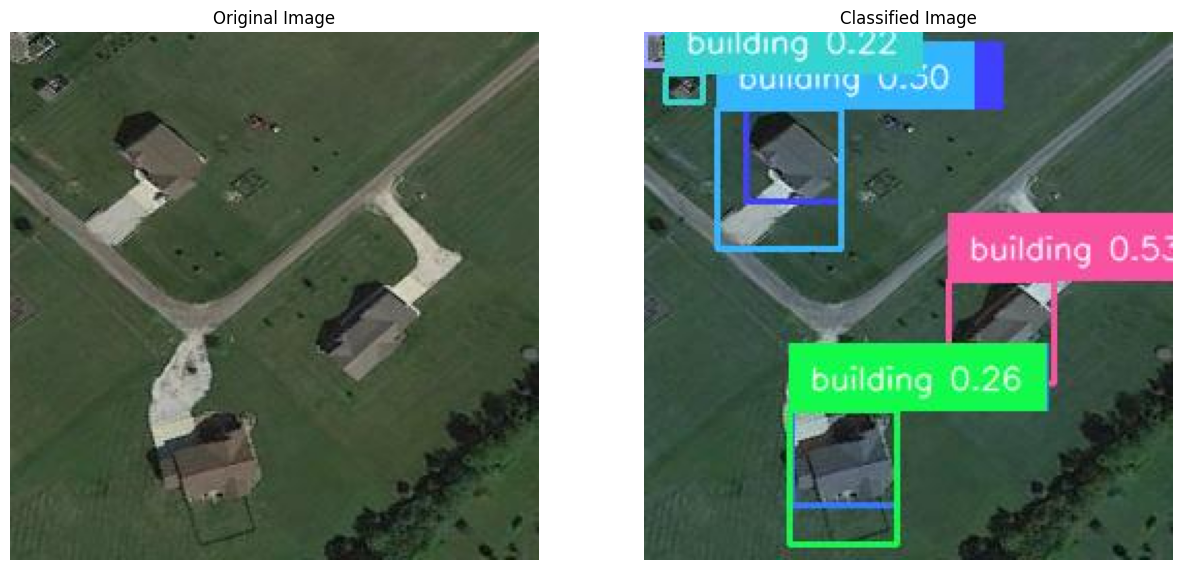

YOLO labels for /content/drive/MyDrive/CLASE3_BIG_DATA/sparse_residential/ISatelitales/sparse_residential/sparse_residential_307.jpg:
0 0.001711519988020882 0.0014901089307386428 -0.0018687856500037014 -0.0014540948322974145
0 0.0009010274661704898 0.0007944669632706791 -0.0004052140284329653 -0.000241106899920851
0 0.0002626529894769192 0.00019033963326364756 0.000175110821146518 0.00012745836284011602
0 0.0011278593738097697 0.0019211020844522864 -0.0006976506556384265 -0.002458741597365588
0 0.0009607043757569045 0.0010593000915832818 -8.045445429161191e-05 -6.079359445720911e-05
0 0.00029145556618459523 0.00031311956263380125 -1.6177073121070862e-05 -0.00020118748943787068
0 0.0011332024587318301 0.0021481007570400834 -0.0006841761060059071 -0.002302354434505105



In [ ]:
# prompt: we neeed to show an original image, classified image, and its recptive YOLO, only one image, how can we do?

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Example usage (replace with your actual paths)
original_image_path = "/content/drive/MyDrive/CLASE3_BIG_DATA/sparse_residential/ISatelitales/sparse_residential/sparse_residential_307.jpg" # Example path. Update this!
classified_image_path = "/content/drive/MyDrive/CLASE3_BIG_DATA/detection/sparse_residential_307.jpg" # Example path. Update this!


# Function to display images side by side
def display_images(original_path, classified_path):
    fig, axes = plt.subplots(1, 2, figsize=(15, 8))

    # Original Image
    img_original = mpimg.imread(original_path)
    axes[0].imshow(img_original)
    axes[0].set_title("Original Image")
    axes[0].axis('off')


    # Classified Image
    img_classified = mpimg.imread(classified_path)
    axes[1].imshow(img_classified)
    axes[1].set_title("Classified Image")
    axes[1].axis('off')


    plt.show()


# Display images
display_images(original_image_path, classified_image_path)


# Display YOLO labels (example - adapt to your labeling scheme)
yolo_label_path = "/content/drive/MyDrive/CLASE3_BIG_DATA/etiquetasYOLO/sparse_residential_307.txt" # Example path
try:
  with open(yolo_label_path, 'r') as f:
      print(f"YOLO labels for {original_image_path}:")
      print(f.read())
except FileNotFoundError:
  print(f"YOLO label file not found at: {yolo_label_path}")

In [ ]:
# Verificar dimensiones de la imagen antes de la predicción
print(f"Image shape: {image_tensor.shape}")

# Verificar las dimensiones de las cajas
print(f"Boxes shape: {boxes.shape}")

Image shape: torch.Size([3, 800, 800])
Boxes shape: torch.Size([4, 4])
